# Instalando Bibliotecas e Dados


In [3]:
#Instaling pycaret
!pip install pycaret[full]

     |████████████████████████████████| 266kB 23.3MB/s 
     |████████████████████████████████| 2.0MB 36.1MB/s 
     |████████████████████████████████| 81kB 8.1MB/s 
     |████████████████████████████████| 174kB 34.4MB/s 
     |████████████████████████████████| 112kB 46.0MB/s 
     |████████████████████████████████| 276kB 34.3MB/s 
     |████████████████████████████████| 256kB 37.2MB/s 
     |████████████████████████████████| 14.2MB 194kB/s 
     |████████████████████████████████| 61kB 6.6MB/s 
     |████████████████████████████████| 1.7MB 34.7MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.4MB 33.6MB/s 
     |████████████████████████████████| 6.8MB 25.9MB/s 
     |████████████████████████████████| 49.4MB 52kB/s 
     |████████████████████████████████| 166.7MB 64kB/s 
     |████████████████████████████████| 307kB 45.9MB

In [140]:
#@markdown Neste projeto, a principal biblioteca que utilizaremos é a PyCaret, a qual se trata de uma biblioteca de aprendizado de máquina de código aberto e baixo código em Python que visa reduzir o tempo de ciclo de hipóteses a insights. O PyCaret permite que você vá desde a preparação de seus dados até a implantação de seu modelo em segundos. Além dessa, utilizaremos também bibliotecas tradicionais para processamento de dados (Pandas), algebra linear (Numpy) e plot das informações (Matplotlib, Seaborn, Plotly).

from pycaret.regression import * # module to work with regression
import numpy as np # linear algebra
import pandas as pd # data processing

# Plotting 
import seaborn as sns
import plotly as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt

# Setup pandas to show all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

# Import of dataset
df0 = pd.read_excel('https://github.com/rmarques0/ads4i_rmarques0/raw/master/Bases_Final_ADS_Jun2021.xlsx', sheet_name="dados")


---

# Overview dos dados

Iremos primeiramente ter uma idéia geral dos dados. Os objetivos dessa sessão são:
* Identificar dados nulos e tratar
* Investigar tendências e correlações
* Comparar diferentes panoramas
* Selecionar principais atributos a serem utilizados no modelo de previsão.

In [247]:
#@title  { run: "auto" }
#@markdown Nesse primeiro momentos é possivel observar que os atributos *renda_r* e *massa_r* contém valores nulos. A seguir iremos investigar melhor a necessidade de utilizá-los.

# Overview of first rows
df0.head()

,data_tidy,com_co,com_n,com_ne,com_s,com_se,ind_co,ind_n,ind_ne,ind_s,ind_se,res_co,res_n,res_ne,res_s,res_se,renda_r,pop_ocup_br,massa_r,du,pmc_a_co,temp_max_co,temp_min_co,pmc_r_co,pim_co,pmc_a_n,temp_max_n,temp_min_n,pmc_r_n,pim_n,pmc_a_ne,temp_max_ne,temp_min_ne,pmc_r_ne,pim_ne,pmc_a_s,temp_max_s,temp_min_s,pmc_r_s,pim_s,pmc_a_se,temp_max_se,temp_min_se,pmc_r_se,pim_se,dow
0,2004-01-01,307.28207,193.80956,589.29026,704.00174,2450.45329,364.326990,840.29035,2015.78331,1810.98019,6977.47082,506.54049,348.58478,1098.66359,1132.50601,3694.38561,NaN,75777.696766,NaN,21,41.454,31.344701,22.248656,45.711,59.0,32.407,31.983871,23.353226,39.582,65.252,36.613,30.408065,23.430242,38.820,87.8,49.488,28.320430,19.165591,54.848,78.497,50.755550,27.618279,20.365591,47.369,75.454326,3
1,2004-02-01,290.14685,175.49530,550.77261,733.89486,2396.96520,372.651510,810.25628,1942.01969,1931.86643,7084.62266,472.10253,323.40268,1000.22133,1121.97048,3511.54126,NaN,76464.330910,NaN,18,39.854,30.819461,21.332451,44.365,63.2,30.021,31.277012,23.041954,35.929,62.180,33.932,30.465517,23.208190,36.268,78.9,46.932,28.213793,18.634483,51.696,80.047,48.108250,28.047126,20.089655,45.738,72.953183,6
2,2004-03-01,307.10015,182.75690,573.02799,738.45706,2402.52074,408.630620,880.88796,2082.25048,2149.03063,7087.61326,493.18088,320.23737,1049.43716,1108.02732,3629.45543,NaN,75925.410718,NaN,23,46.245,31.649770,21.136021,50.427,70.5,33.292,31.575269,23.253226,39.125,76.728,39.008,30.930242,23.439919,40.177,88.1,54.556,27.595699,17.848387,57.356,95.784,54.134850,28.181720,19.749463,49.252,83.942665,0
3,2004-04-01,329.16091,189.49076,603.93873,743.57047,2580.91388,419.430051,861.61210,2056.94675,2164.76220,7384.53963,506.07092,339.77486,1097.25059,1132.04707,3733.86311,NaN,77102.272116,NaN,20,45.065,30.372381,20.808889,50.649,65.0,33.740,32.407222,23.251667,40.121,75.084,37.197,30.561667,23.271250,39.593,81.5,53.024,26.797778,17.729310,58.216,92.275,52.015075,27.537778,19.650000,49.755,79.495481,3
4,2004-05-01,303.23791,191.64219,570.17652,696.57947,2344.08400,407.523810,901.70980,2100.19137,2164.98022,7258.30672,492.80831,332.15491,1033.00684,1082.10257,3537.26872,NaN,77353.867496,NaN,21,47.724,25.491060,16.872043,53.663,73.7,37.340,31.824194,22.543548,45.135,75.820,40.033,30.373683,22.742742,42.347,85.2,54.860,20.615054,12.606452,60.436,92.550,54.345225,25.391398,17.573118,51.849,84.187962,5


In [250]:
#@markdown A seguir temos um resumo de das principais informações do dataset.<br>
#@markdown **Dimensões do dataset:**  (228, 46) <br> 
#@markdown **Percentual de dados nulos:**
#@markdown * Com aproximadamente 43%: massa_r, renda_r (essas colunas serão desconsideradas na modelagem) <br>
#@markdown * As medições de consumo Industrial, Residencial e Comercial possui aproximadamente 10% de dados faltantes. Vale observar que esses dados fazem parte do período que utilizaremos para o forecast. Dessa forma trataremos essas informações no pipeline do PyCaret


print ( 'Dimensões do dataset: ', df0.shape,'\n')
print ( 'Formatos dos dados:') 
print ( df0.info(), '\n')
print ( 'Visão geral dos dados numéricos:\n', df0.describe().round(2), '\n')
print ( 'Contagem de dados únicos:\n', df0.nunique(), '\n')
print ( 'Contagem de valores nulos:\n', df0.isnull().sum(), '\n')
print ( 'Percentual de dados nulos:\n', (df0.isna().sum()/df0.isna().count() *100).sort_values(ascending=False), '\n')

Dimensões do dataset:  (228, 46) 

Formatos dos dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 46 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   data_tidy    228 non-null    datetime64[ns]
 1   com_co       206 non-null    float64       
 2   com_n        206 non-null    float64       
 3   com_ne       206 non-null    float64       
 4   com_s        206 non-null    float64       
 5   com_se       206 non-null    float64       
 6   ind_co       206 non-null    float64       
 7   ind_n        206 non-null    float64       
 8   ind_ne       206 non-null    float64       
 9   ind_s        206 non-null    float64       
 10  ind_se       206 non-null    float64       
 11  res_co       206 non-null    float64       
 12  res_n        206 non-null    float64       
 13  res_ne       206 non-null    float64       
 14  res_s        206 non-null    float64       
 15  re

In [101]:
# Create a dataset for each region

# Select columns
df0['dow'] = df0['data_tidy'].dt.dayofweek
cols_se = ['data_tidy', 'dow', 'pop_ocup_br', 'du', 'pmc_a_se','temp_max_se', 'temp_min_se', 'pmc_r_se', 'pim_se','com_se', 'res_se','ind_se']
cols_co = ['data_tidy', 'dow', 'pop_ocup_br', 'du', 'pmc_a_co','temp_max_co', 'temp_min_co', 'pmc_r_co', 'pim_co','com_co', 'res_co','ind_co','ind_se']
cols_n  = ['data_tidy', 'dow', 'pop_ocup_br', 'du', 'pmc_a_n','temp_max_n', 'temp_min_n', 'pmc_r_n', 'pim_n','com_n', 'res_n','ind_n','ind_se']
cols_ne = ['data_tidy', 'dow', 'pop_ocup_br', 'du', 'pmc_a_ne','temp_max_ne', 'temp_min_ne', 'pmc_r_ne', 'pim_ne','com_ne', 'res_ne','ind_ne','ind_se']
cols_s  = ['data_tidy', 'dow', 'pop_ocup_br', 'du', 'pmc_a_s','temp_max_s', 'temp_min_s', 'pmc_r_s', 'pim_s','com_s', 'res_s','ind_s','ind_se']
#Create datasets
dfse = df0[cols_se].copy()
dfco = df0[cols_co].copy()
dfn  = df0[cols_n].copy()
dfne = df0[cols_ne].copy()
dfs  = df0[cols_s].copy()


In [242]:
# Check null values to drop from 
dfse_null = dfse[dfse.isna().any(axis=1)]
dfse_null.head(100)

,data_tidy,dow,pop_ocup_br,du,pmc_a_se,temp_max_se,temp_min_se,pmc_r_se,pim_se,com_se,res_se,ind_se
206,2021-03-01,0,85220.796427,23,102.869087,29.656336,21.058587,102.861504,82.737395,NaN,NaN,NaN
207,2021-04-01,3,85515.493606,20,94.241224,28.071241,20.193866,95.278607,82.378939,NaN,NaN,NaN
208,2021-05-01,5,85759.491015,21,95.191733,25.543384,17.997973,96.216951,89.213434,NaN,NaN,NaN
209,2021-06-01,1,85981.966586,22,93.081274,25.084524,17.207192,93.248462,88.322010,NaN,NaN,NaN
210,2021-07-01,3,86246.850625,22,94.597792,25.030878,16.524591,94.383083,92.415160,NaN,NaN,NaN
211,2021-08-01,6,86663.297637,22,96.499363,25.456828,16.789763,95.671568,95.892364,NaN,NaN,NaN
212,2021-09-01,2,87138.168671,21,91.508157,27.567455,18.683656,91.873176,91.650249,NaN,NaN,NaN
213,2021-10-01,4,87673.088988,20,94.715525,28.260280,19.973731,95.422355,93.754645,NaN,NaN,NaN
214,2021-11-01,0,87864.948532,20,98.223652,27.657544,20.111149,100.094698,86.402606,NaN,NaN,NaN
215,2021-12-01,2,87582.824706,23,112.955303,29.092269,21.201404,122.167337,75.109567,NaN,NaN,NaN


In [245]:
#@title Consumo Elétrico Industrial por Região { run: "auto", display-mode: "form" }
#@markdown Para se ter uma ideia geral do comportamento do consumo industrial da Região Sudeste, vamos compará-lo com o consumo das outras Regiões.


# Compare industrial consumption for each region
fig = go.Figure([
    go.Scatter(
        name='Sudeste',
        x = dfse.data_tidy,
        y = (dfse.ind_se),
        marker=dict(color=px.colors.qualitative.T10[4]),

        showlegend=True,
    ),    
    go.Scatter(
        name='Nordeste',
        x = dfne.data_tidy,
        y = (dfne.ind_ne),
        marker=dict(color=px.colors.qualitative.Safe[0]),
        showlegend=True
    ),    
    go.Scatter(
        name='Sul',
        x = dfs.data_tidy,
        y = (dfs.ind_s),
        marker=dict(color=px.colors.qualitative.Safe[1]),
        showlegend=True
    ),    
    go.Scatter(
        name='Centro-Oeste',
        x = dfco.data_tidy,
        y = (dfco.ind_co),
        marker=dict(color=px.colors.qualitative.Safe[2]),
        showlegend=True
    ),    
    go.Scatter(
        name='Norte',
        x = dfn.data_tidy,
        y = (dfn.ind_n),
        marker=dict(color=px.colors.qualitative.Safe[5]),
        showlegend=True
    )
])
fig.update_layout(
    width=1800,
    height=800,
    yaxis_title='Consumo GWh',
    title='Consumo Elétrico Industrial por Região',
    hovermode="x",
    template = 'none'
)

fig.show()


In [204]:
# Plot consumption info SE
fig = go.Figure([
    go.Scatter(
        name='Industrial',
        x = dfse.data_tidy,
        y= dfse.ind_se,
        marker=dict(color=px.colors.qualitative.T10[4]),
        showlegend=True
    ),    
    go.Scatter(
        name='Comercial',
        x = dfse.data_tidy,
        y = dfse.com_se,
        marker=dict(color=px.colors.qualitative.T10[0]),
        showlegend=True
    ),
        go.Scatter(
        name='Residencial',
        x = dfse.data_tidy,
        y=dfse.res_se,
        marker=dict(color=px.colors.qualitative.T10[3]),
        showlegend=True
    )
])
fig.update_layout(
    width=1800,
    height=800,
    yaxis_title='Consumo GWh',
    title='Consumo Elétrico da Região Sudeste por Categoria',
    hovermode="x",
    template = 'none'
)
fig.show()


Text(0.5, 1.0, 'Correlação dos dados')

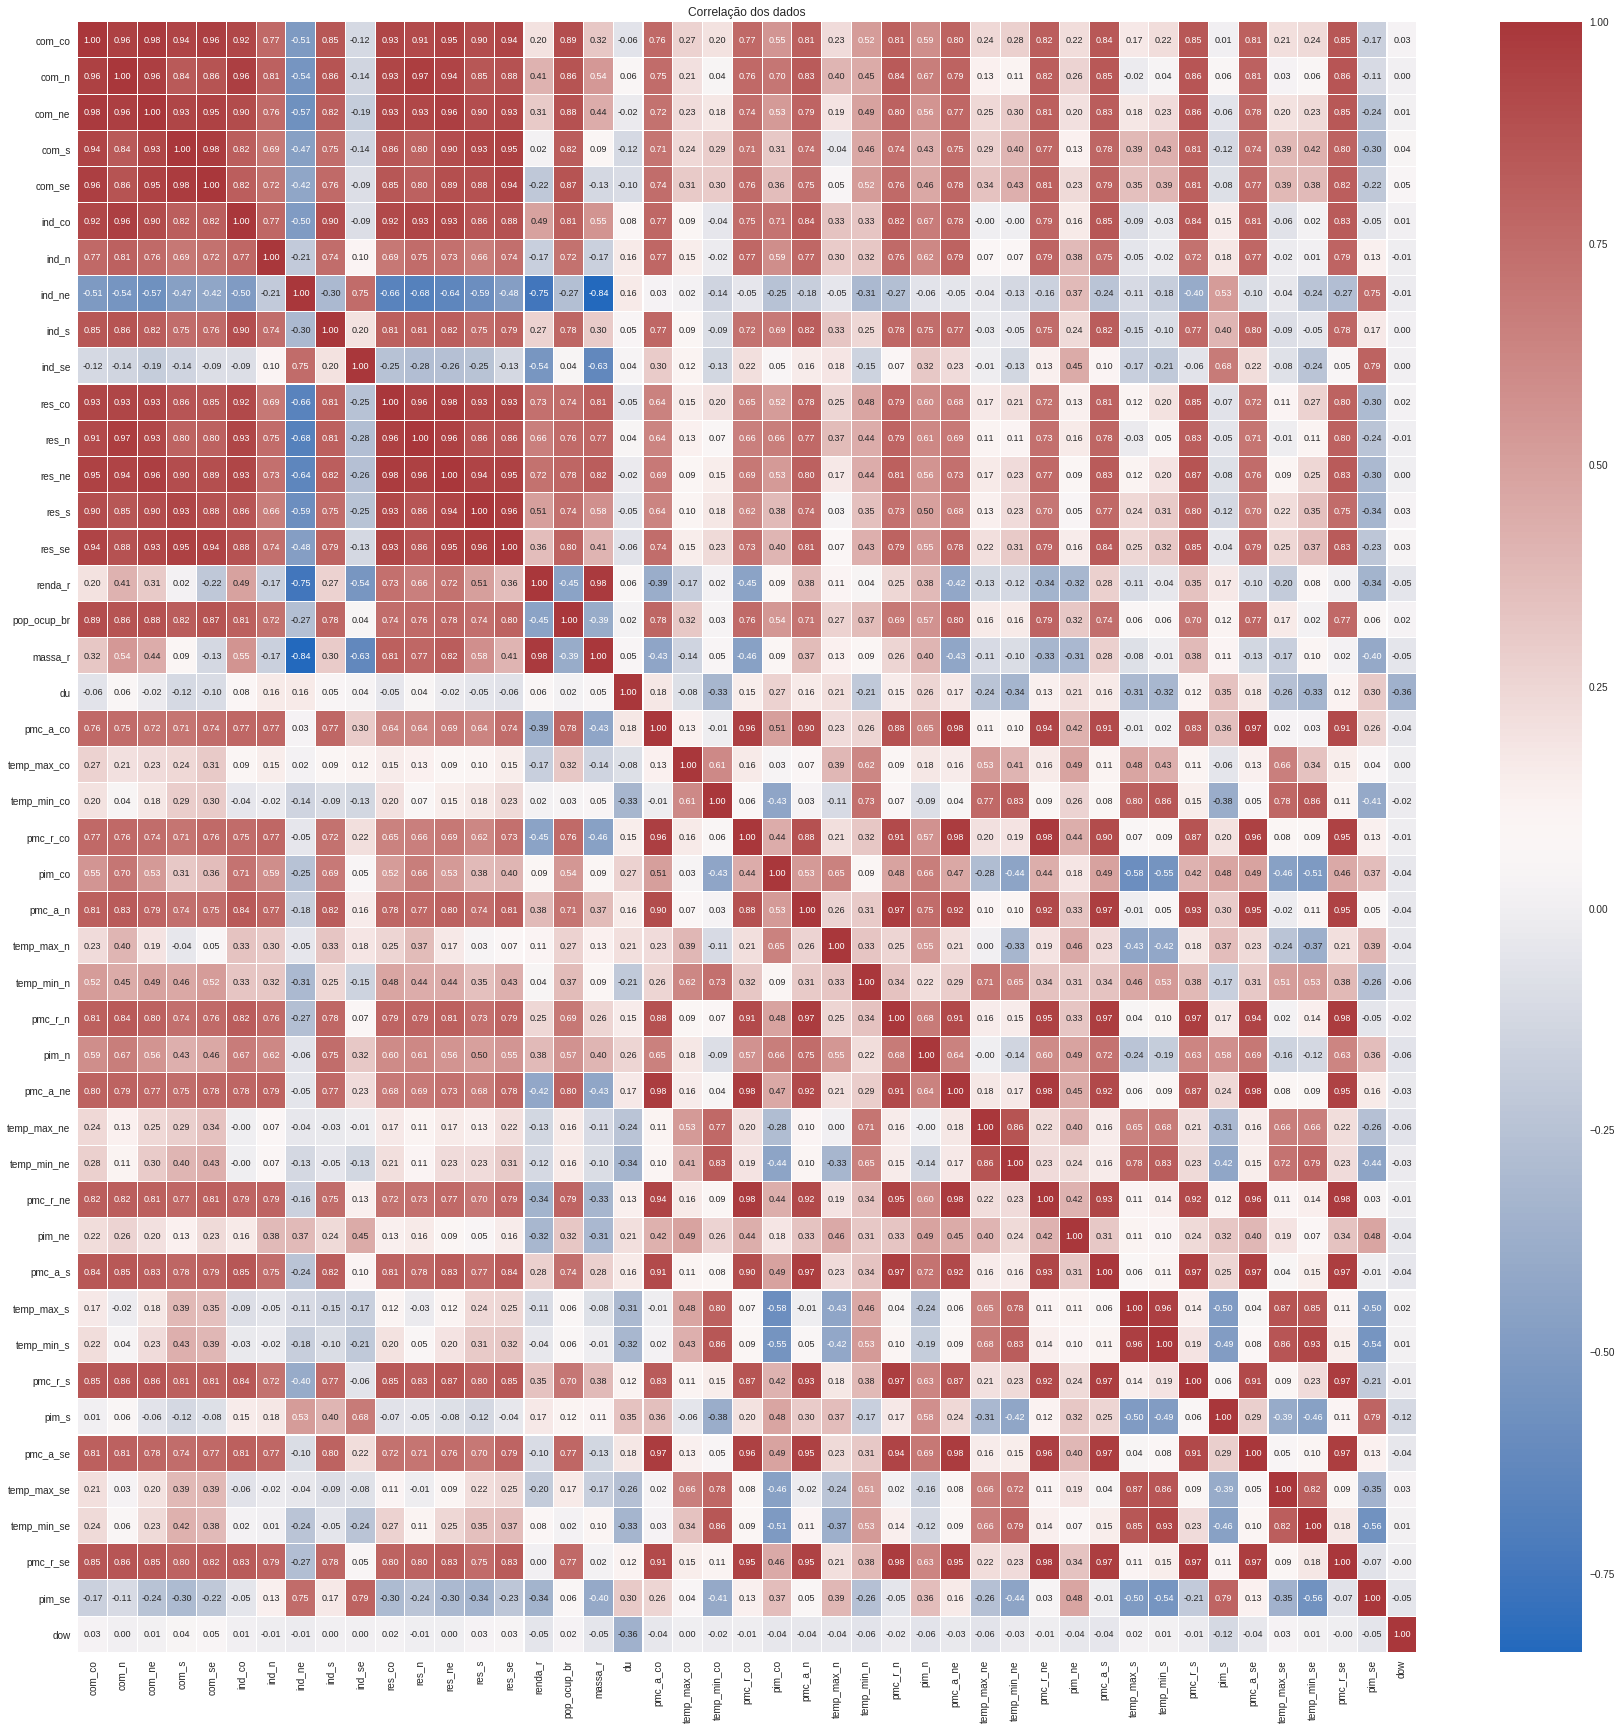

In [376]:
plt.figure(figsize=(30,30))
sns.heatmap(df0.corr(method='pearson'),linewidths=0.1,vmax=1.0, square=False, annot=True, fmt='.2f', annot_kws={"size": 9}, cmap = "vlag")
plt.title('Correlação dos dados')


Pearson r correlation: Pearson r correlation is the most widely used correlation statistic to measure the degree of the relationship between linearly related variables. For example, in the stock market, if we want to measure how two stocks are related to each other, Pearson r correlation is used to measure the degree of relationship between the two. The point-biserial correlation is conducted with the Pearson correlation formula except that one of the variables is dichotomous.

Effect size: Cohen’s standard may be used to evaluate the correlation coefficient to determine the strength of the relationship, or the effect size.  Correlation coefficients between .10 and .29 represent a small association, coefficients between .30 and .49 represent a medium association, and coefficients of .50 and above represent a large association or relationship.

Continuous data: Data that is interval or ratio level.  This type of data possesses the properties of magnitude and equal intervals between adjacent units.  Equal intervals between adjacent units means that there are equal amounts of the variable being measured between adjacent units on the scale.  An example would be age.  An increase in age from 21 to 22 would be the same as an increase in age from 60 to 61.

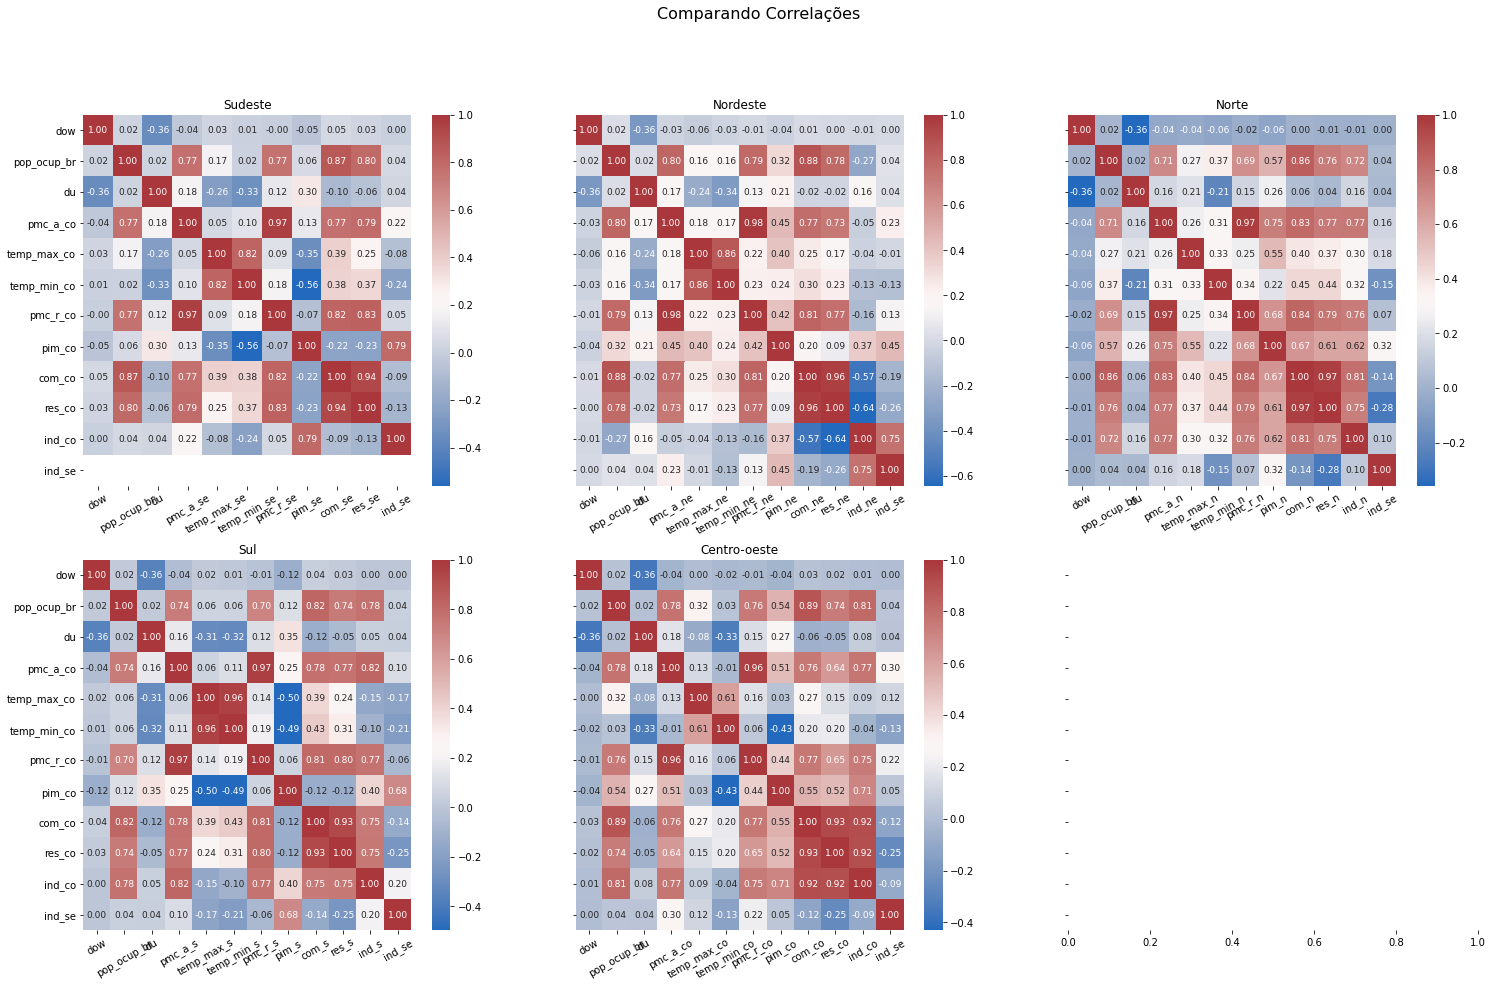

In [136]:
fig, axes = plt.subplots(2, 3, figsize=(25,15), sharey=True)
fig.suptitle('Comparando Correlações', fontsize=16)
sns.despine(bottom = True, left = True)

Sudeste = sns.heatmap(dfse.corr(method='pearson'), annot=True, fmt='.2f', annot_kws={"size": 9}, cmap = "vlag",ax=axes[0,0])
axes[0,0].set_title('Sudeste')
plt.setp(Sudeste.get_xticklabels(), rotation=30)

Nordeste = sns.heatmap(dfne.corr(method='pearson'),vmax=1.0, annot=True, fmt='.2f', annot_kws={"size": 9}, cmap = "vlag", ax=axes[0,1])
axes[0,1].set_title('Nordeste')
plt.setp(Nordeste.get_xticklabels(), rotation=30)

Norte = sns.heatmap(dfn.corr(method='pearson'),vmax=1.0, annot=True, fmt='.2f', annot_kws={"size": 9}, cmap = "vlag", ax=axes[0,2])
axes[0,2].set_title('Norte')
plt.setp(Norte.get_xticklabels(), rotation=30)

Sul = sns.heatmap(dfs.corr(method='pearson'),vmax=1.0, annot=True, fmt='.2f', annot_kws={"size": 9}, cmap = "vlag", ax=axes[1,0])
axes[1,0].set_title('Sul')
plt.setp(Sul.get_xticklabels(), rotation=30)

Centrooeste = sns.heatmap(dfco.corr(method='pearson'),vmax=1.0, annot=True, fmt='.2f', annot_kws={"size": 9}, cmap = "vlag", ax=axes[1,1])
axes[1,1].set_title('Centro-oeste')
plt.setp(Centrooeste.get_xticklabels(), rotation=30);


Nordeste : ind_ne, pin_ne:moderado
Norte: Nenhum
Sul: pim_s
Cento-Oeste: nenhum

---
# Preparando dados para modelagem



In [169]:

# Organize dataset into: Train, Test, Predict
dfmodel = df0.copy()
# extract month and year from dates
dfmodel['month'] = [i.month for i in dfmodel['data_tidy']]
dfmodel['year'] = [i.year for i in dfmodel['data_tidy']]
dfmodel['series'] = np.arange(1,len(dfmodel)+1)

#Relevant cols
dfmodel = dfmodel[[#'series', 
                   'data_tidy', 'year', 'month', 'dow', 'pop_ocup_br', 'du', 'pmc_a_se', 'temp_max_se', 'temp_min_se', 'pmc_r_se', 'pim_se', 'pim_s','pim_ne', 'ind_ne','ind_se']]


# split data into train-test set
train_test = dfmodel[dfmodel['data_tidy'] < '2021-01-01'].copy()
train = train_test[train_test['year'] < 2018]
test = train_test[train_test['year'] >= 2018]

#predictions set
dfpred = dfmodel.copy()
dfpred = dfmodel.iloc[:,:-1] # drop target

# check shape
train.shape, test.shape, dfpred.shape



((168, 15), (36, 15), (228, 14))

# Modelagem

Now it’s time to initialize the setup function, where we will explicitly pass the training data, test data, and cross-validation strategy using the fold_strategy parameter.

In [171]:
# This function initializes the training environment and creates the transformation pipeline. 

s = setup(data = train, 
          test_data = test, 
          target = 'ind_se', 
          fold_strategy = 'timeseries', 
          numeric_features = [#'series', 
                              'year', 'month', 'dow', 'pop_ocup_br', 'du', 'pmc_a_se', 'temp_max_se', 'temp_min_se', 'pmc_r_se', 'pim_se', 'pim_s','pim_ne', 'ind_ne'],
          date_features = ['data_tidy'],
          normalize = True,
          normalize_method = 'robust', #robust: scales and translates each feature according to the Interquartile range. When the dataset contains outliers, robust scaler often gives better results.
          fold = 10, 
          silent = True,
          session_id = 123 # make sure we use same random seeds
          )

,Description,Value
0,session_id,123
1,Target,ind_se
2,Original Data,"(168, 15)"
3,Missing Values,False
4,Numeric Features,13
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(168, 34)"


In [172]:
# Compare some models: Returns table of models available in the model library and their performance
top5_raw = compare_models(sort='MAE', n_select = 5, turbo = False)
results = pull()
type(results) # get a dataframe with this info

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,2.506241e+02,1.045017e+05,3.037969e+02,-3.775000e-01,0.0388,3.200000e-02,0.013
ransac,Random Sample Consensus,2.518992e+02,1.546676e+05,3.104934e+02,-1.290100e+00,0.0397,3.220000e-02,0.047
ridge,Ridge Regression,2.572654e+02,1.209714e+05,3.077469e+02,-1.144200e+00,0.0394,3.240000e-02,0.014
br,Bayesian Ridge,2.594037e+02,1.236394e+05,3.100449e+02,-1.213500e+00,0.0396,3.270000e-02,0.016
llar,Lasso Least Angle Regression,2.635767e+02,1.330159e+05,3.173183e+02,-1.324900e+00,0.0404,3.310000e-02,0.017
lasso,Lasso Regression,2.749896e+02,1.334600e+05,3.231990e+02,-1.533500e+00,0.0412,3.450000e-02,0.015
ard,Automatic Relevance Determination,2.867461e+02,1.361147e+05,3.383146e+02,-1.652900e+00,0.0432,3.590000e-02,0.105
et,Extra Trees Regressor,2.977830e+02,1.554556e+05,3.557592e+02,-1.239900e+00,0.0454,3.800000e-02,0.388
catboost,CatBoost Regressor,3.046634e+02,1.532825e+05,3.555381e+02,-1.331700e+00,0.0455,3.890000e-02,1.352
rf,Random Forest Regressor,3.071131e+02,1.588329e+05,3.687968e+02,-1.283400e+00,0.0471,3.910000e-02,0.429


pandas.core.frame.DataFrame

In [173]:
# Tune top 5 models based on MAE
top5_t = [tune_model(i, optimize='MAE') for i in top5_raw]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,116.2123,19771.1977,140.6101,0.3788,0.0179,0.0150
1,362.2526,166762.5331,408.3657,-1.2955,0.0503,0.0434
2,508.1401,431586.9755,656.9528,0.1084,0.0878,0.0697
3,163.3113,39521.1666,198.7993,0.8111,0.0252,0.0209
4,543.5338,356514.2148,597.0881,-11.6528,0.0738,0.0638
5,311.2694,152869.0055,390.9847,-2.4443,0.0484,0.0371
6,154.8443,38466.2154,196.1281,0.3856,0.0240,0.0187
7,230.2548,78360.9533,279.9303,-0.6095,0.0354,0.0295
8,127.6595,23336.1237,152.7617,0.5580,0.0210,0.0173
9,118.2892,22971.0512,151.5620,0.5115,0.0205,0.0159


In [175]:
# Overview of each module tuned param
top5_t

[OrthogonalMatchingPursuit(fit_intercept=True, n_nonzero_coefs=9,
                           normalize=False, precompute='auto', tol=None),
 RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
                 loss='absolute_loss', max_skips=2, max_trials=13,
                 min_samples=0.4, random_state=123, residual_threshold=None,
                 stop_n_inliers=23, stop_probability=0.91, stop_score=inf),
 Ridge(alpha=7.73, copy_X=True, fit_intercept=True, max_iter=None,
       normalize=False, random_state=123, solver='auto', tol=0.001),
 BayesianRidge(alpha_1=0.001, alpha_2=0.01, alpha_init=None, compute_score=True,
               copy_X=True, fit_intercept=True, lambda_1=0.0005, lambda_2=1e-06,
               lambda_init=None, n_iter=300, normalize=False, tol=0.001,
               verbose=False),
 LassoLars(alpha=1.0, copy_X=True, eps=0.02, fit_intercept=True, fit_path=True,
           jitter=None, max_iter=500, normalize=True, positive=False,
         

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

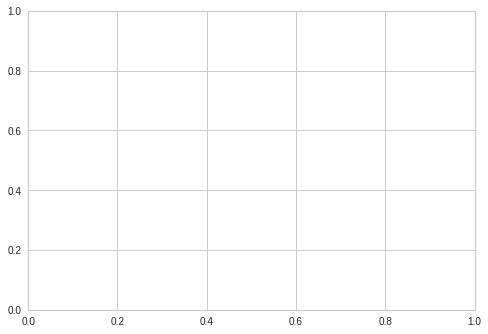

In [160]:
# Evaluate best model: This function displays a user interface for all of the available plots for a given estimator
evaluate_model(top5_t[0])

In [366]:
#plot_model(t_top5[0], plot='residuals_interactive')

# Predictions

In [181]:
# Predict data using each of top models
new = dfpred[dfpred['data_tidy'] < '2021-01-01']
pred0 = predict_model(top5_t[0], data = new)
pred1 = predict_model(top5_t[1], data = new)
pred2 = predict_model(top5_t[2], data = new)
pred3 = predict_model(top5_t[3], data = new)
pred4 = predict_model(top5_t[4], data = new)

In [182]:
pred0.head()

,data_tidy,year,month,dow,pop_ocup_br,du,pmc_a_se,temp_max_se,temp_min_se,pmc_r_se,pim_se,pim_s,pim_ne,ind_ne,Label
0,2004-01-01,2004,1,3,75777.696766,21,50.755550,27.618279,20.365591,47.369,75.454326,78.497,87.8,2015.78331,6908.711949
1,2004-02-01,2004,2,6,76464.330910,18,48.108250,28.047126,20.089655,45.738,72.953183,80.047,78.9,1942.01969,7117.734048
2,2004-03-01,2004,3,0,75925.410718,23,54.134850,28.181720,19.749463,49.252,83.942665,95.784,88.1,2082.25048,7189.913266
3,2004-04-01,2004,4,3,77102.272116,20,52.015075,27.537778,19.650000,49.755,79.495481,92.275,81.5,2056.94675,7507.952806
4,2004-05-01,2004,5,5,77353.867496,21,54.345225,25.391398,17.573118,51.849,84.187962,92.550,85.2,2100.19137,7364.340903


In [211]:
# Plot comparisson of models
fig = go.Figure([
        go.Scatter(
        name = '3º ' + results.Model[2],
        x = pred2.data_tidy,
        y = pred2.Label,
        marker=dict(color=px.colors.qualitative.Set3[8]),
        showlegend=True
    ),
    go.Scatter(
        name='2º ' + results.Model[1],
        x = pred1.data_tidy,
        y = pred1.Label,
        marker=dict(color=px.colors.qualitative.Set3[8]),
        showlegend=True
    ),
    go.Scatter(
        name='1º ' + results.Model[0],
        x = pred0.data_tidy,
        y = pred0.Label,
        marker=dict(color=px.colors.qualitative.Set3[5]),
        showlegend=True
    ),
    go.Scatter(
        name='Real data',
        x = dfse.data_tidy,
        y = dfse.ind_se,
        marker=dict(color=px.colors.qualitative.T10[4]),
        showlegend=True
    )
])
fig.update_layout(
    width=1800,
    height=800,
    yaxis_title='Consumo GWh',
    title='Comparação gráfica entre modelos',
    hovermode="x",
    template = 'none'
)

fig.show()

In [212]:
# Finalize model do drop all trasholding
print(finalize_model(top5_t[0]))
#print(finalize_model(top5_t[1]))
#print(finalize_model(top5_t[2]))
#print(finalize_model(top5_t[3]))
#print(finalize_model(top5_t[4]))

OrthogonalMatchingPursuit(fit_intercept=True, n_nonzero_coefs=9,
                          normalize=False, precompute='auto', tol=None)


In [185]:
final = save_model(top5_t[0], 'model_fcast_ind_se')
final 

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=['year', 'month',
                                                           'dow', 'pop_ocup_br',
                                                           'du', 'pmc_a_se',
                                                           'temp_max_se',
                                                           'temp_min_se',
                                                           'pmc_r_se', 'pim_se',
                                                           'pim_s', 'pim_ne',
                                                           'ind_ne'],
                                       target='ind_se',
                                       time_features=['data

In [238]:
# To load saved module and use it for predicting new values

new_data = dfpred[dfpred['data_tidy'] >= '2021-01-01'].copy()
pipeline = load_model('model_fcast_ind_se')
forecast = predict_model(pipeline, new_data)
predictions = predict_model(pipeline, dfpred[dfpred['data_tidy'] < '2021-01-01'].copy())
print(pipeline)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=['year', 'month',
                                                          'dow', 'pop_ocup_br',
                                                          'du', 'pmc_a_se',
                                                          'temp_max_se',
                                                          'temp_min_se',
                                                          'pmc_r_se', 'pim_se',
                                                          'pim_s', 'pim_ne',
                                                          'ind_ne'],
                                      target='ind_se',
                   

In [239]:
forecast

,data_tidy,year,month,dow,pop_ocup_br,du,pmc_a_se,temp_max_se,temp_min_se,pmc_r_se,pim_se,pim_s,pim_ne,ind_ne,Label
204,2021-01-01,2021,1,4,85291.458634,20,101.597599,27.128683,23.132233,103.143866,78.170288,94.941000,96.300000,1907.27970,7215.085019
205,2021-02-01,2021,2,0,85007.546249,19,93.371718,25.865171,22.377857,94.828878,76.198104,95.624000,85.900000,1818.73298,7180.517559
206,2021-03-01,2021,3,0,85220.796427,23,102.869087,29.656336,21.058587,102.861504,82.737395,107.377658,93.146726,NaN,7619.427311
207,2021-04-01,2021,4,3,85515.493606,20,94.241224,28.071241,20.193866,95.278607,82.378939,102.218763,87.293167,NaN,7993.297241
208,2021-05-01,2021,5,5,85759.491015,21,95.191733,25.543384,17.997973,96.216951,89.213434,108.277568,91.134322,NaN,7879.101371
209,2021-06-01,2021,6,1,85981.966586,22,93.081274,25.084524,17.207192,93.248462,88.322010,104.216181,86.817602,NaN,7768.923703
210,2021-07-01,2021,7,3,86246.850625,22,94.597792,25.030878,16.524591,94.383083,92.415160,108.906742,93.237132,NaN,7890.320591
211,2021-08-01,2021,8,6,86663.297637,22,96.499363,25.456828,16.789763,95.671568,95.892364,112.955375,98.706458,NaN,8011.326581
212,2021-09-01,2021,9,2,87138.168671,21,91.508157,27.567455,18.683656,91.873176,91.650249,104.326637,97.543986,NaN,8010.273800
213,2021-10-01,2021,10,4,87673.088988,20,94.715525,28.260280,19.973731,95.422355,93.754645,109.992390,106.248098,NaN,8191.145561


In [241]:

# Plot comparisson of models
fig = go.Figure([
    go.Scatter(
        name = 'Prediction',
        x = predictions.data_tidy,
        y = predictions.Label,
        marker=dict(color=px.colors.qualitative.Set3[8]),
        showlegend=True
    ),
    go.Scatter(
        name = 'Forecast',
        x = forecast.data_tidy,
        y = forecast.Label,
        marker=dict(color=px.colors.qualitative.Set3[5]),
        showlegend=True
    ),
    go.Scatter(
        name='Real data',
        x = dfmodel.data_tidy,
        y = dfmodel.ind_se,
        marker=dict(color=px.colors.qualitative.T10[4]),
        showlegend=True
    )
])
fig.update_layout(
    width=1800,
    height=800,
    yaxis_title='Consumo GWh',
    title='Forecast Consumo Elétrico Industrial na Região SE',
    hovermode="x",
    template = 'none'
)
fig.show()